In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from statsmodels.formula.api import ols

In [11]:
ads = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

In [12]:
ads.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [13]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


In [14]:
from mpl_toolkits.mplot3d import Axes3D

([], <a list of 0 Text yticklabel objects>)

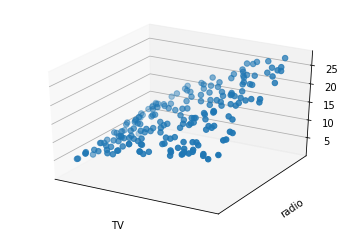

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(ads['TV'], ads['radio'], ads['sales'], s = 30)
ax.set_xlabel('TV')
ax.set_ylabel('radio')
plt.xticks([])
plt.yticks([])

In [36]:
ads.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [37]:
m, b = np.polyfit(ads['TV'], ads['sales'], 1)

In [38]:
m

0.04753664043301973

In [39]:
b

7.0325935491276965

In [40]:
def l(x):
    return m*x + b

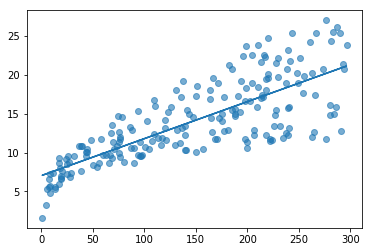

In [66]:
plt.scatter(ads['TV'], ads['sales'], alpha = 0.6)
plt.plot(ads['TV'], l(ads.TV))

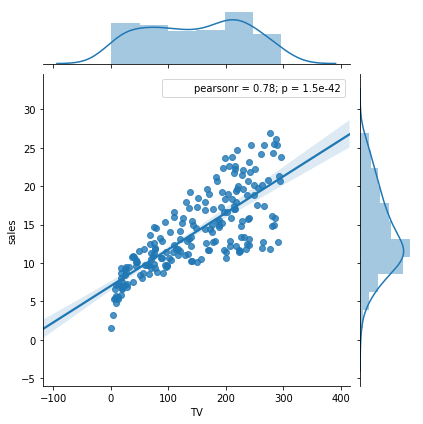

In [50]:
sns.jointplot('TV', 'sales', data = ads, kind = 'reg')

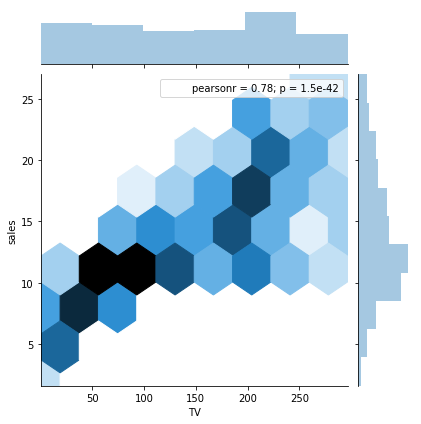

In [51]:
sns.jointplot('TV', 'sales', data = ads, kind = 'hex')

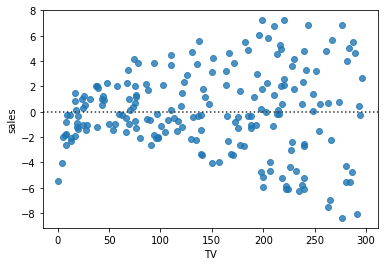

In [48]:
sns.residplot('TV', 'sales', data = ads)

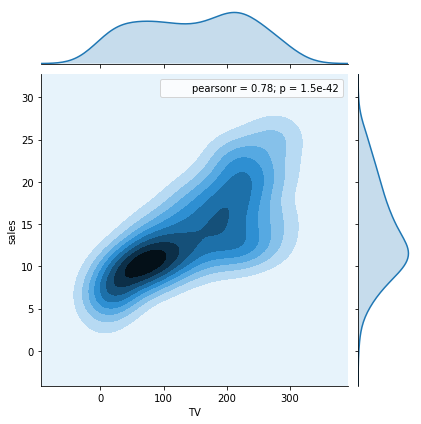

In [52]:
sns.jointplot('TV', 'sales', data = ads, kind = 'kde')

In [67]:
model = ols("sales ~ TV + radio", data=ads).fit()
# summarize our model
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 26 Mar 2018   Prob (F-statistic):           4.83e-98
Time:                        22:49:00   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

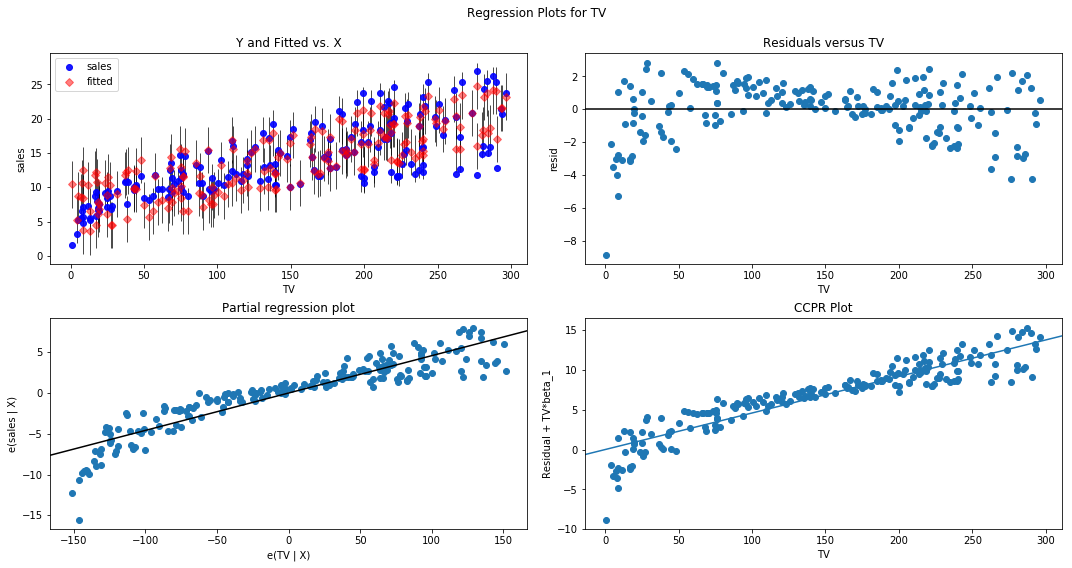

In [64]:
import statsmodels.api as sm
fig = plt.figure(figsize=(15,8))

# pass in the model as the first parameter, then specify the 
# predictor variable we want to analyze
fig = sm.graphics.plot_regress_exog(model, "TV", fig=fig)

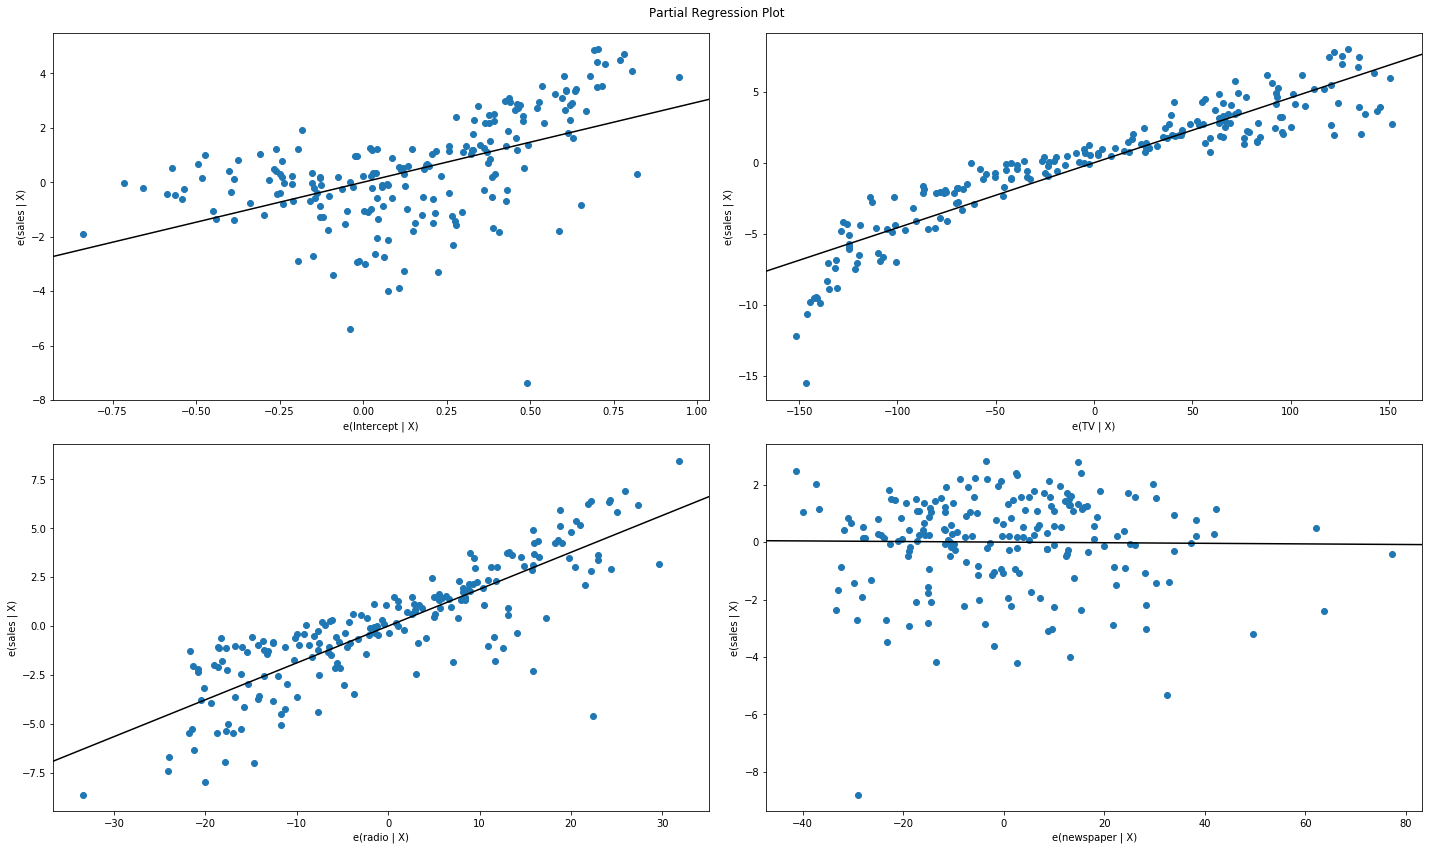

In [65]:
fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)